# Practice Top2Vec with sklearn dataset

In [8]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

In [3]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [51]:
type(newsgroups)

sklearn.utils._bunch.Bunch

In [55]:
newsgroups.data

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

In [4]:
type(newsgroups.data)

list

In [5]:
newsgroups.data[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [6]:
len(newsgroups.data)

18846

In [7]:
len(newsgroups.data[0])

712

In [32]:
list_len = [len(sentunce) for sentunce in newsgroups.data]
list_len[0]

712

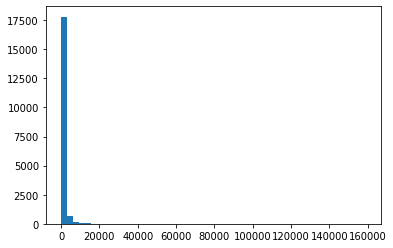

In [35]:
plt.hist(list_len, bins=50);

In [14]:
model = Top2Vec(newsgroups.data, workers=4)

2022-06-07 10:36:34,647 - top2vec - INFO - Pre-processing documents for training
2022-06-07 10:36:41,628 - top2vec - INFO - Creating joint document/word embedding
2022-06-07 10:40:49,204 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-06-07 10:41:16,335 - top2vec - INFO - Finding dense areas of documents
2022-06-07 10:41:17,488 - top2vec - INFO - Finding topics


In [16]:
model.get_num_topics()

113

In [42]:
model.topic_words[0]

array(['bike', 'car', 'cars', 'ride', 'engine', 'rear', 'honda', 'tires',
       'bikes', 'brakes', 'riding', 'mph', 'wheel', 'gear', 'suspension',
       'wheels', 'throttle', 'miles', 'tire', 'motorcycle', 'steering',
       'front', 'brake', 'ford', 'toyota', 'valve', 'passenger', 'bmw',
       'seat', 'driving', 'cylinder', 'torque', 'clutch', 'shaft',
       'dealer', 'stock', 'parking', 'pedal', 'exhaust', 'rpm', 'highway',
       'abs', 'road', 'mileage', 'seats', 'cage', 'sho', 'speed', 'buy',
       'bought'], dtype='<U15')

In [18]:
model.topic_words[0]

array(['bike', 'car', 'cars', 'ride', 'engine', 'rear', 'honda', 'tires',
       'bikes', 'brakes', 'riding', 'mph', 'wheel', 'gear', 'suspension',
       'wheels', 'throttle', 'miles', 'tire', 'motorcycle', 'steering',
       'front', 'brake', 'ford', 'toyota', 'valve', 'passenger', 'bmw',
       'seat', 'driving', 'cylinder', 'torque', 'clutch', 'shaft',
       'dealer', 'stock', 'parking', 'pedal', 'exhaust', 'rpm', 'highway',
       'abs', 'road', 'mileage', 'seats', 'cage', 'sho', 'speed', 'buy',
       'bought'], dtype='<U15')

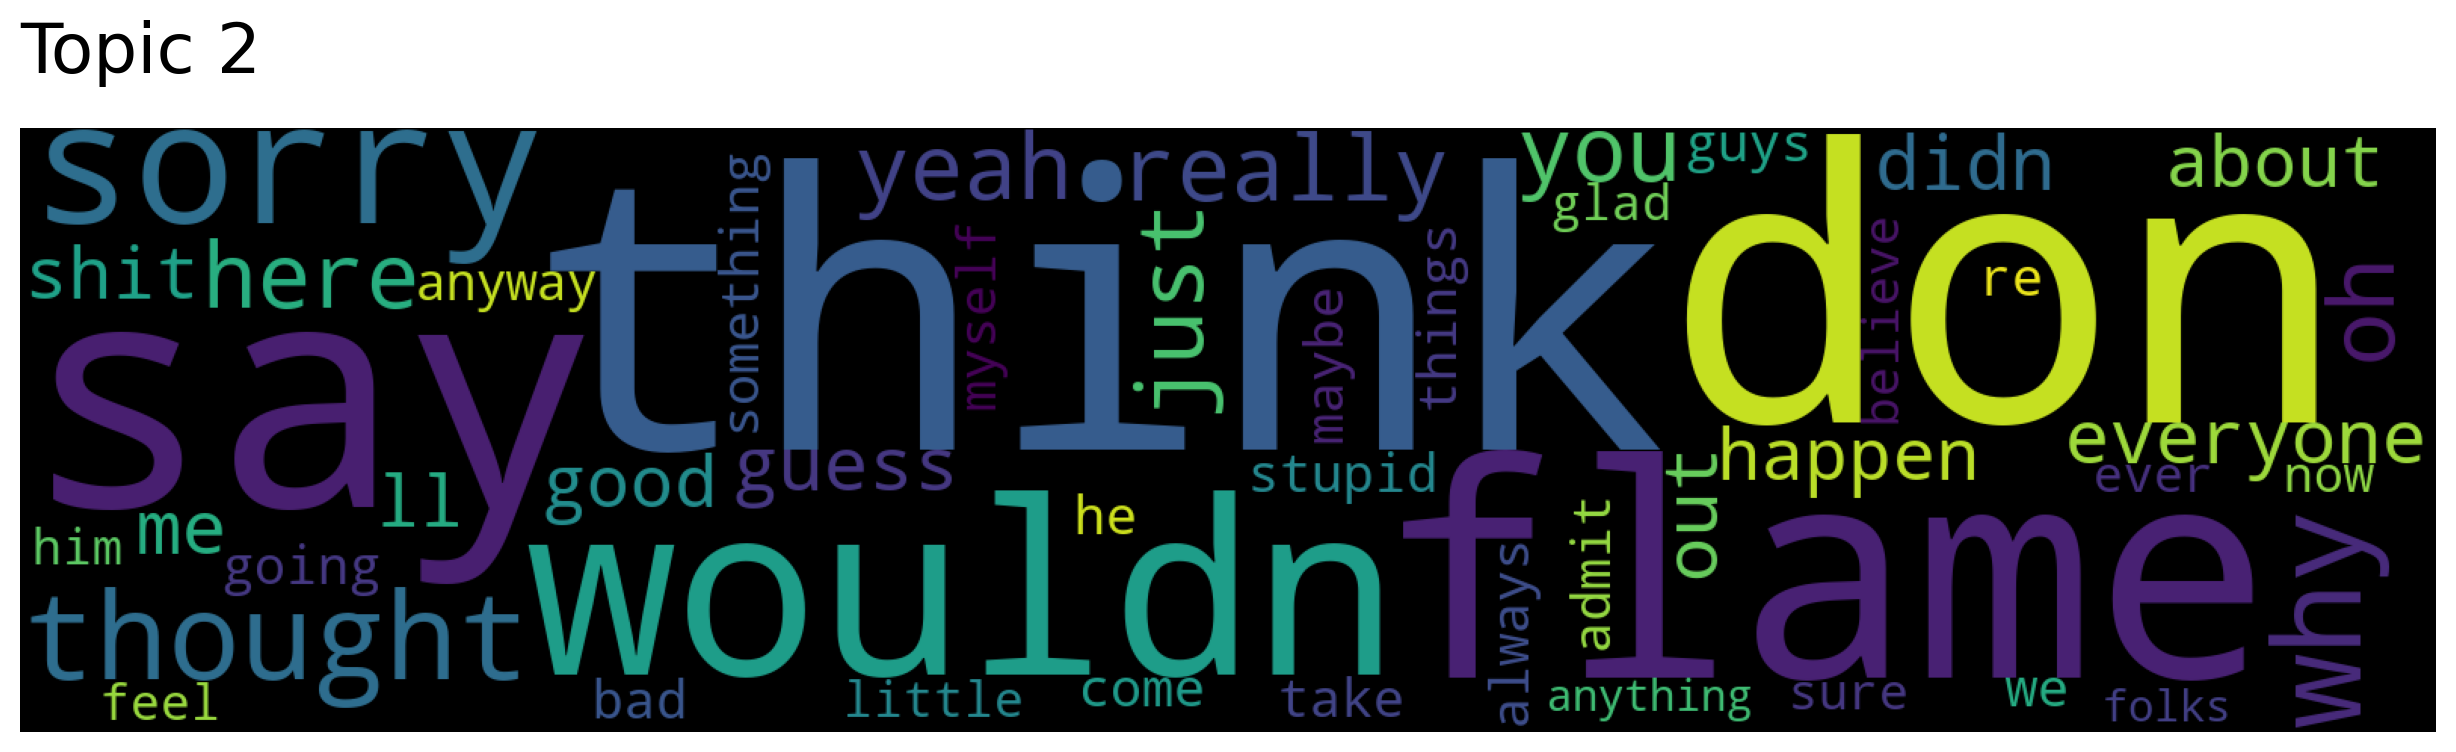

In [58]:
model.generate_topic_wordcloud(2)

In [49]:
len(model.topic_vectors[112])

300

In [21]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], num_topics=3)

In [22]:
topic_words, topic_scores

([array(['libertarians', 'libertarian', 'welfare', 'ideal', 'government',
         'society', 'political', 'liberal', 'civil', 'country', 'economy',
         'philosophy', 'constitutional', 'intervention', 'democratic',
         'individual', 'rights', 'benefit', 'constitution', 'economic',
         'posters', 'politics', 'parties', 'democracy', 'governments',
         'spending', 'freedom', 'nation', 'people', 'realize', 'reform',
         'interests', 'strikes', 'politically', 'republican', 'feasible',
         'fundamental', 'sort', 'social', 'amendment', 'intellectual',
         'approach', 'convince', 'coalition', 'arabs', 'threat', 'agree',
         'abuse', 'notion', 'wishes'], dtype='<U15'),
  array(['gun', 'handgun', 'firearms', 'guns', 'handguns', 'crime',
         'firearm', 'violent', 'homicides', 'weapons', 'criminal',
         'abiding', 'homicide', 'criminals', 'assault', 'concealed', 'nra',
         'crimes', 'citizen', 'legally', 'accidents', 'armed', 'deaths',
       

In [28]:
model.search_documents_by_topic(0, num_docs=1)

(array(["\n\tNot to start *another* shaft effect discussion, but the twist you\n\tfeel when revving sitting still is due to the larger fly-wheels that\n\tthe BMW R-bikes (maybe K's too, dunno) use. If you whack the throttle\n\tat stop lights, it'll really rock the bike over (to the right).\n\n\t<snip> \t<snip>\n\n\tPlease post if you come to any conclusion on this. I am thinking\n\tof putting a light on each cylinder guard on my R100S, and was\n\twondering whether I was going to have to switch lights off every\n\ttime I was under 5,000 RPM :-)\n\n\n"],
       dtype=object),
 array([0.6922897], dtype=float32),
 array([16034]))

# Using Top2Vec with sentiment 140 dataset - Kaggle

In [65]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "mac_roman")

In [66]:
data

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [63]:
!ls

top2vec_test.ipynb
training.1600000.processed.noemoticon.csv


In [87]:
content = data.iloc[range(0,100000),-1]

In [88]:
content[0]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [89]:
list_tweets = [i for i in content]

In [90]:
len(list_tweets)

100000

In [91]:
model = Top2Vec(list_tweets, workers=4, speed='fast-learn')

2022-06-07 14:54:14,793 - top2vec - INFO - Pre-processing documents for training
2022-06-07 14:54:17,611 - top2vec - INFO - Creating joint document/word embedding
2022-06-07 14:57:03,254 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-07 14:58:34,539 - top2vec - INFO - Finding dense areas of documents
2022-06-07 14:58:39,993 - top2vec - INFO - Finding topics


In [94]:
model.get_num_topics()

5

In [97]:
model.topic_words[0]

array(['balls', 'also', 'darn', 'hat', 'sux', 'mark', 'desperate', 'meh',
       'ahhhh', 'yup', 'lets', 'situation', 'suddenly', 'quit', 'score',
       'damnit', 'possibly', 'breaks', 'ohh', 'public', 'badly', 'track',
       'prob', 'cos', 'kidding', 'sadness', 'yep', 'fighting',
       'obviously', 'king', 'oooh', 'high', 'alive', 'atm', 'earth',
       'stick', 'drop', 'pop', 'mate', 'bummer', 'neither', 'mi', 'level',
       'breaking', 'experience', 'twitters', 'station', 'sort', 'acting',
       'allowed'], dtype='<U10')

In [98]:
model.topic_words[1]

array(['mo', 'apps', 'tumblr', 'hopes', 'via', 'sadness', 'profile',
       'view', 'daily', 'results', 'ms', 'photo', 'tiny', 'says', 'score',
       'pics', 'quit', 'pet', 'gd', 'player', 'frustrated', 'official',
       'ad', 'www', 'hates', 'discovered', 'net', 'feed', 'de', 'media',
       'updating', 'sa', 'camera', 'myloc', 'ff', 'bill', 'tr',
       'background', 'plurk', 'na', 'pic', 'losing', 'facebook', 'wall',
       'comp', 'bug', 'ng', 'ch', 'cost', 'pro'], dtype='<U10')

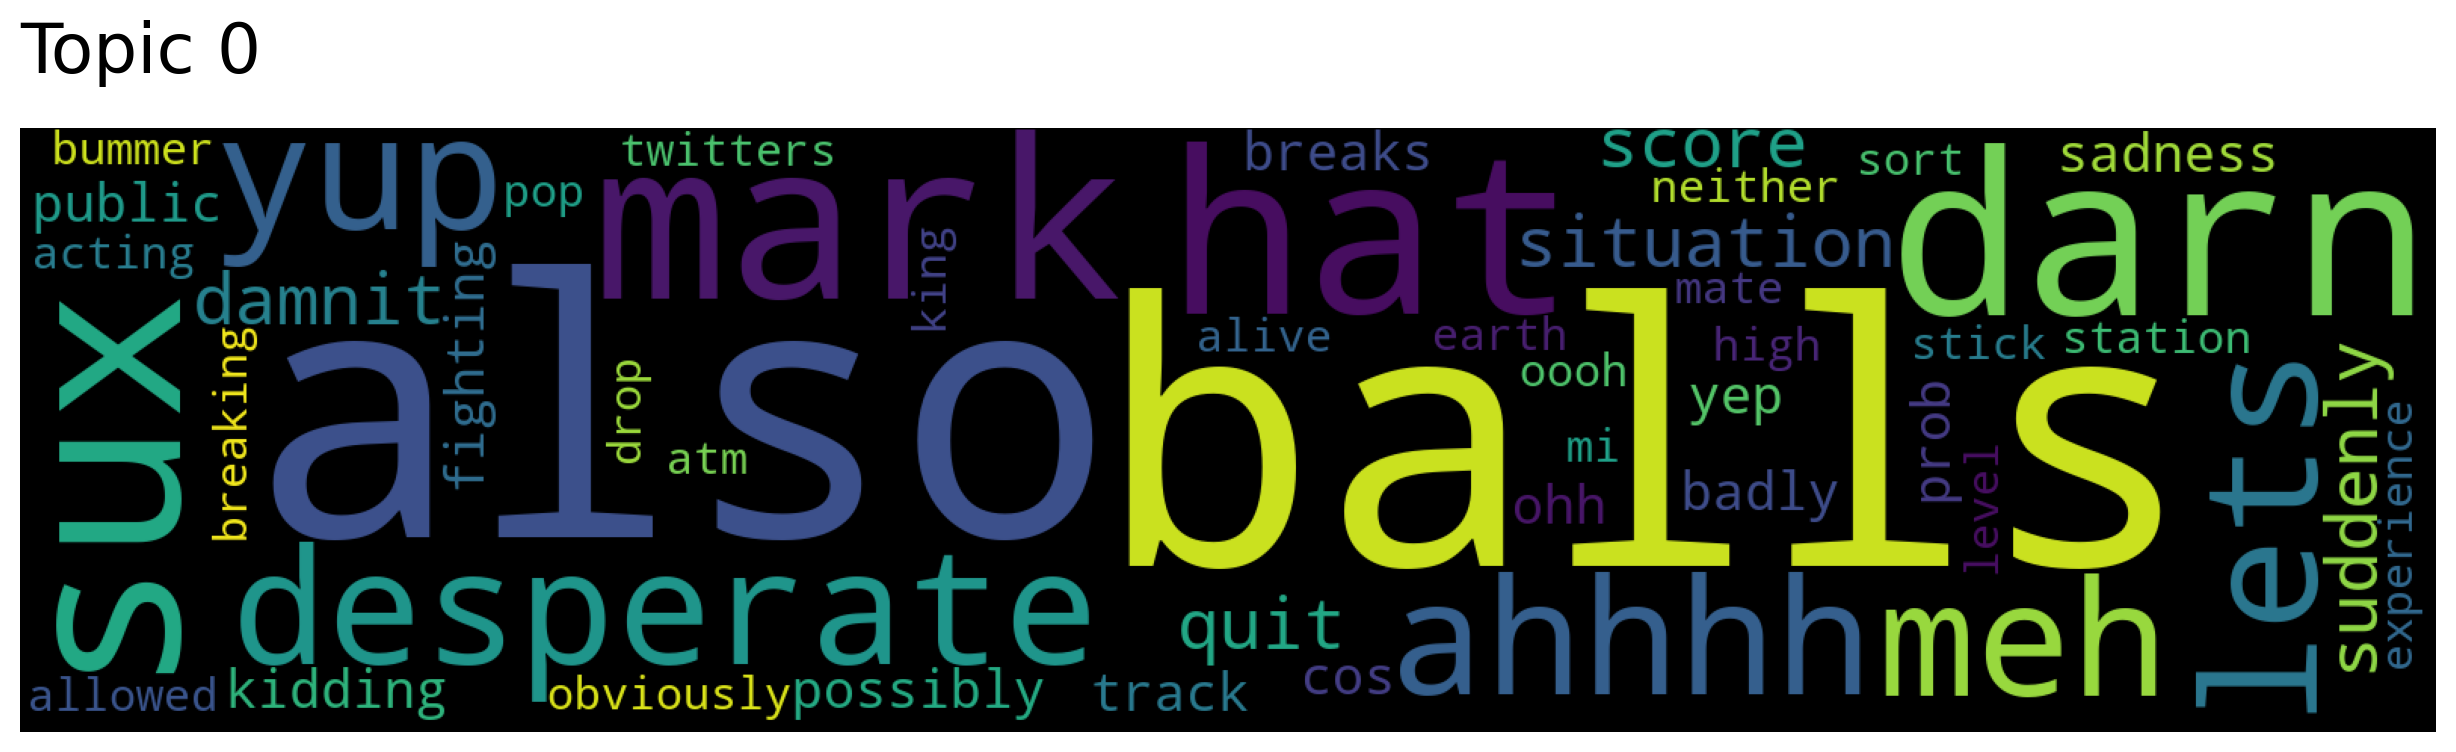

In [102]:
model.generate_topic_wordcloud(0)

In [93]:
#model_deeplearn = Top2Vec(list_tweets, workers=4, speed='deep-learn')

In [111]:
model.get_topic_sizes(reduced=False)

(array([98178,  1078,   383,   183,   178]), array([0, 1, 2, 3, 4]))

In [112]:
model.get_topic_sizes(reduced=False)[0].sum()

100000

In [109]:
topic_0 = model.search_documents_by_topic(0, num_docs=30)

In [107]:
topic_0[0]

array(['Oh, I can hardly bear to watch it...! ',
       '@ben_simpson thanks ben ', 'Damn Larry king is crying ',
       '@iraisavampire bob called me a twit.... ',
       'i wish ben has twitter ', 'DC tomorrow... I m nt prepared!! ',
       'lost my builders hat ', 'mark just popped my straw! ',
       'bye, Chuck. ', 'ooh noo, mr. hangover? ',
       'Loves craft brew aand games.  except when someone breaks a table ',
       '@jayniebee just showing off now!!  LOL',
       "Realising i'm not in a band anymore ",
       'Internet is down  sorry aku inda dpt gossip sma kamu @f_nadzirah and @faidchong (',
       'Wants to be followed by the King of Twitter ',
       'awww i missed desperate housewives ', 'im not a loser! ',
       'We missed the lion king ',
       '@CHICKENRYY I have yet to watch wall-e ', 'Chega de Khan Wars '],
      dtype=object)